In [ ]:
!pip install keepa #install first time

     |████████████████████████████████| 1.3MB 6.4MB/s 
     |████████████████████████████████| 143kB 18.5MB/s 
     |████████████████████████████████| 296kB 19.5MB/s 
  Created wheel for keepa: filename=keepa-1.2.1-cp37-none-any.whl size=26050 sha256=f64a11021c4933147765ef1b935ce508ecb0e55ec9436c382923736b47af30d9
  Stored in directory: /root/.cache/pip/wheels/e3/a9/08/ba96bb3b3347ce39fb61a531ae0274363275236c626dbdd96c
Successfully built keepa


In [ ]:
import numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tqdm
import asyncio
import nest_asyncio
nest_asyncio.apply()
import keepa


In [ ]:

#accesskey = '5grcrbpkkeo30reskiljkn0mbn4sn26bqsmoen1u8m973sh6lgdvjmb3k8lracth' # enter real access key here
#api = keepa.Keepa(accesskey)

#Funcion para sacar datos de Keepa en formato de Dataset para poder trabajar, dos dataset y nombre: Amazon_Seller, External_Amazon_Seller, Product_Name.
def Create_Data_Product(entrada, place):
  
  accesskey = '5grcrbpkkeo30reskiljkn0mbn4sn26bqsmoen1u8m973sh6lgdvjmb3k8lracth' # enter real access key here
  api = keepa.Keepa(accesskey)  
  # Single ASIN query
  products = api.query(entrada,domain=place) # returns list of product data, no domain->.com; domain=ES->Spain;One of the following Amazon domains: RESERVED, US, GB, DE, FR, JP, CA, CN, IT, ES, IN, MX Defaults to US.

  # Plot result (requires matplotlib)
  #keepa.plot_product(products[0])

  #AMAZON SELLER
  name=products[0]['title']
  #lst=pd.DataFrame(list(name))
  Data_amazon_price= pd.DataFrame(products[0]['data']['AMAZON'])
  Data_amazon_timestamp= pd.DataFrame(products[0]['data']['AMAZON_time'])
  Data_amazon_timestamp
  Data_amazon_price.columns=["PRICE"]
  Data_amazon_timestamp.columns=["TIMESTAMP"]
  Data_amazon=pd.concat([Data_amazon_timestamp, Data_amazon_price], axis=1)
  Data_amazon=Data_amazon.fillna(method="ffill")
  Data_amazon.dropna(inplace=True)
  #EXTERNAL SELLER
  Data_new_price= pd.DataFrame(products[0]['data']['NEW'])
  Data_new_timestamp= pd.DataFrame(products[0]['data']['NEW_time'])
  Data_new_price.columns=["PRICE"]
  Data_new_timestamp.columns=["TIMESTAMP"]
  Data_new=pd.concat([Data_new_timestamp, Data_new_price], axis=1)
  Data_new=Data_new.fillna(method="ffill")
  Data_new.dropna(inplace=True)
  print("\n")
  return Data_amazon, Data_new, name;


#Nos interesa sacar los precios a nivel de Amazon España de las tarjetas gráficas y ver como evoluciona su precio respecto factores externos.

#ASUS PH-GTX1050TI-4G - Tarjeta gráfica (NVIDIA GeForce GTX 1050 Ti, 4 GB GDDR5) https://www.amazon.es/ASUS-PH-GTX1050TI-4G-Tarjeta-gr%C3%A1fica-GeForce/dp/B01MFBKRI5
Amazon_1050,Ext_1050,name_1050=Create_Data_Product('B01MFBKRI5', "ES")
print('\033[1m'+'\033[4m'+'\033[95m'+name_1050+'\033[0m')
print(Amazon_1050)
print(Ext_1050)

#EVGA GeForce GTX 1060 3GB GAMING, ACX 2.0 (solo ventilador), 3GB GDDR5   https://www.amazon.es/EVGA-ventilador-Tarjetas-gr%C3%A1ficos-03G-P4-6160-KR/dp/B01KUADE3O/ref=sr_1_2?__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=1060+6gb&qid=1614008085&sr=8-2
Amazon_1060,Ext_1060,name_1060=Create_Data_Product('B01KUADE3O', "ES")
print('\033[1m'+'\033[4m'+'\033[95m'+name_1060+'\033[0m')
print(Amazon_1060)
print(Ext_1060)

#MSI Geforce GTX 1660 SUPER VENTUS XS OC - Tarjeta gráfica (6 GB GDDR6) https://www.amazon.es/MSI-Geforce-1660-Super-Ventus/dp/B07ZPM6WKQ/ref=sr_1_1?__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=2QURTXL0YQOTH&dchild=1&keywords=1660+super&qid=1614009487&sprefix=16%2Caps%2C204&sr=8-1
Amazon_1060_Super,Ext_1060_Super,name_1060_Super=Create_Data_Product('B07ZPM6WKQ', "ES")
print('\033[1m'+'\033[4m'+'\033[95m'+name_1060_Super+'\033[0m')
print(Amazon_1060_Super)
print(Ext_1060_Super)

#ASUS TURBO-RTX2060-6G - Tarjeta gráfica (NVIDIA GeForce RTX 2060) https://www.amazon.es/ASUS-TURBO-RTX2060-6G-Tarjeta-gr%C3%A1fica-GeForce/dp/B07MJKTS4P/ref=sr_1_6?__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=2060+super&qid=1614009872&sr=8-6
Amazon_2060,Ext_2060,name_2060=Create_Data_Product('B07MJKTS4P', "ES")
print('\033[1m'+'\033[4m'+'\033[95m'+name_2060+'\033[0m')
print(Amazon_2060)
print(Ext_2060)

#Gigabyte GeForce RTX 2070 Super WINDFORCE OC 3x 8G https://www.amazon.es/Gigabyte-GeForce-WINDFORCE-Tarjeta-refrigeraci%C3%B3n/dp/B07X51LTKK/ref=sr_1_2?__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=2060+super&qid=1614010010&sr=8-2
Amazon_2070,Ext_2070,name_2070=Create_Data_Product('B07X51LTKK', "ES")
print('\033[1m'+'\033[4m'+'\033[95m'+name_2070+'\033[0m')
print(Amazon_2070)
print(Ext_2070)

#ASUS ROG Strix GeForce RTX 2080 Ti OC Edition - Tarjeta gráfica (11 GB, GDDR6) https://www.amazon.es/ASUS-ROG-Strix-GeForce-2080/dp/B07HNMT91C/ref=sr_1_4?__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=rtx+2080&qid=1614010156&sr=8-4
Amazon_2080_ti,Ext_2080_ti,name_2080_ti=Create_Data_Product('B07HNMT91C', "ES")
print('\033[1m'+'\033[4m'+'\033[95m'+name_2080_ti+'\033[0m')
print(Amazon_2080_ti)
print(Ext_2080_ti)

#Gigabyte RTX 3070 Gaming OC - Tarjeta gráfica GeForce 8 GB https://www.amazon.es/Gigabyte-RTX-3070-Gaming-OC/dp/B08KHL21CV/ref=sr_1_1?__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=rtx+3070&qid=1614010323&sr=8-1
Amazon_3070,Ext_3070,name_3070=Create_Data_Product('B08KHL21CV', "ES")
print('\033[1m'+'\033[4m'+'\033[95m'+name_3070+'\033[0m')
print(Amazon_3070)
print(Ext_3070)

#ASUS TUF Gaming NVIDIA GeForce RTX 3080 OC Edition 10GB GDDR6X https://www.amazon.es/ASUS-Gaming-NVIDIA-GeForce-GDDR6X/dp/B08HN4DSTC?ref_=ast_sto_dp
Amazon_3080,Ext_3080,name_3080=Create_Data_Product('B08HN4DSTC', "ES")
print('\033[1m'+'\033[4m'+'\033[95m'+name_3080+'\033[0m')
print(Amazon_3080)
print(Ext_3080)

#ZOTAC Gaming GeForce RTX 3090 Trinity 24GB GDDR6X 384-bit 19.5 https://www.amazon.es/ZOTAC-IceStorm-refrigeraci%C3%B3n-iluminaci%C3%B3n-ZT-A30900D-10P/dp/B08HJQ182D/ref=sr_1_2?__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=rtx+3090&qid=1614010757&s=computers&sr=1-2
Amazon_3090,Ext_3090,name_3090=Create_Data_Product('B08HJQ182D', "ES")
print('\033[1m'+'\033[4m'+'\033[95m'+name_3090+'\033[0m')
print(Amazon_3090)
print(Ext_3090)

Exception: ignored

Text(0.5, 1.0, 'RTX 3090')

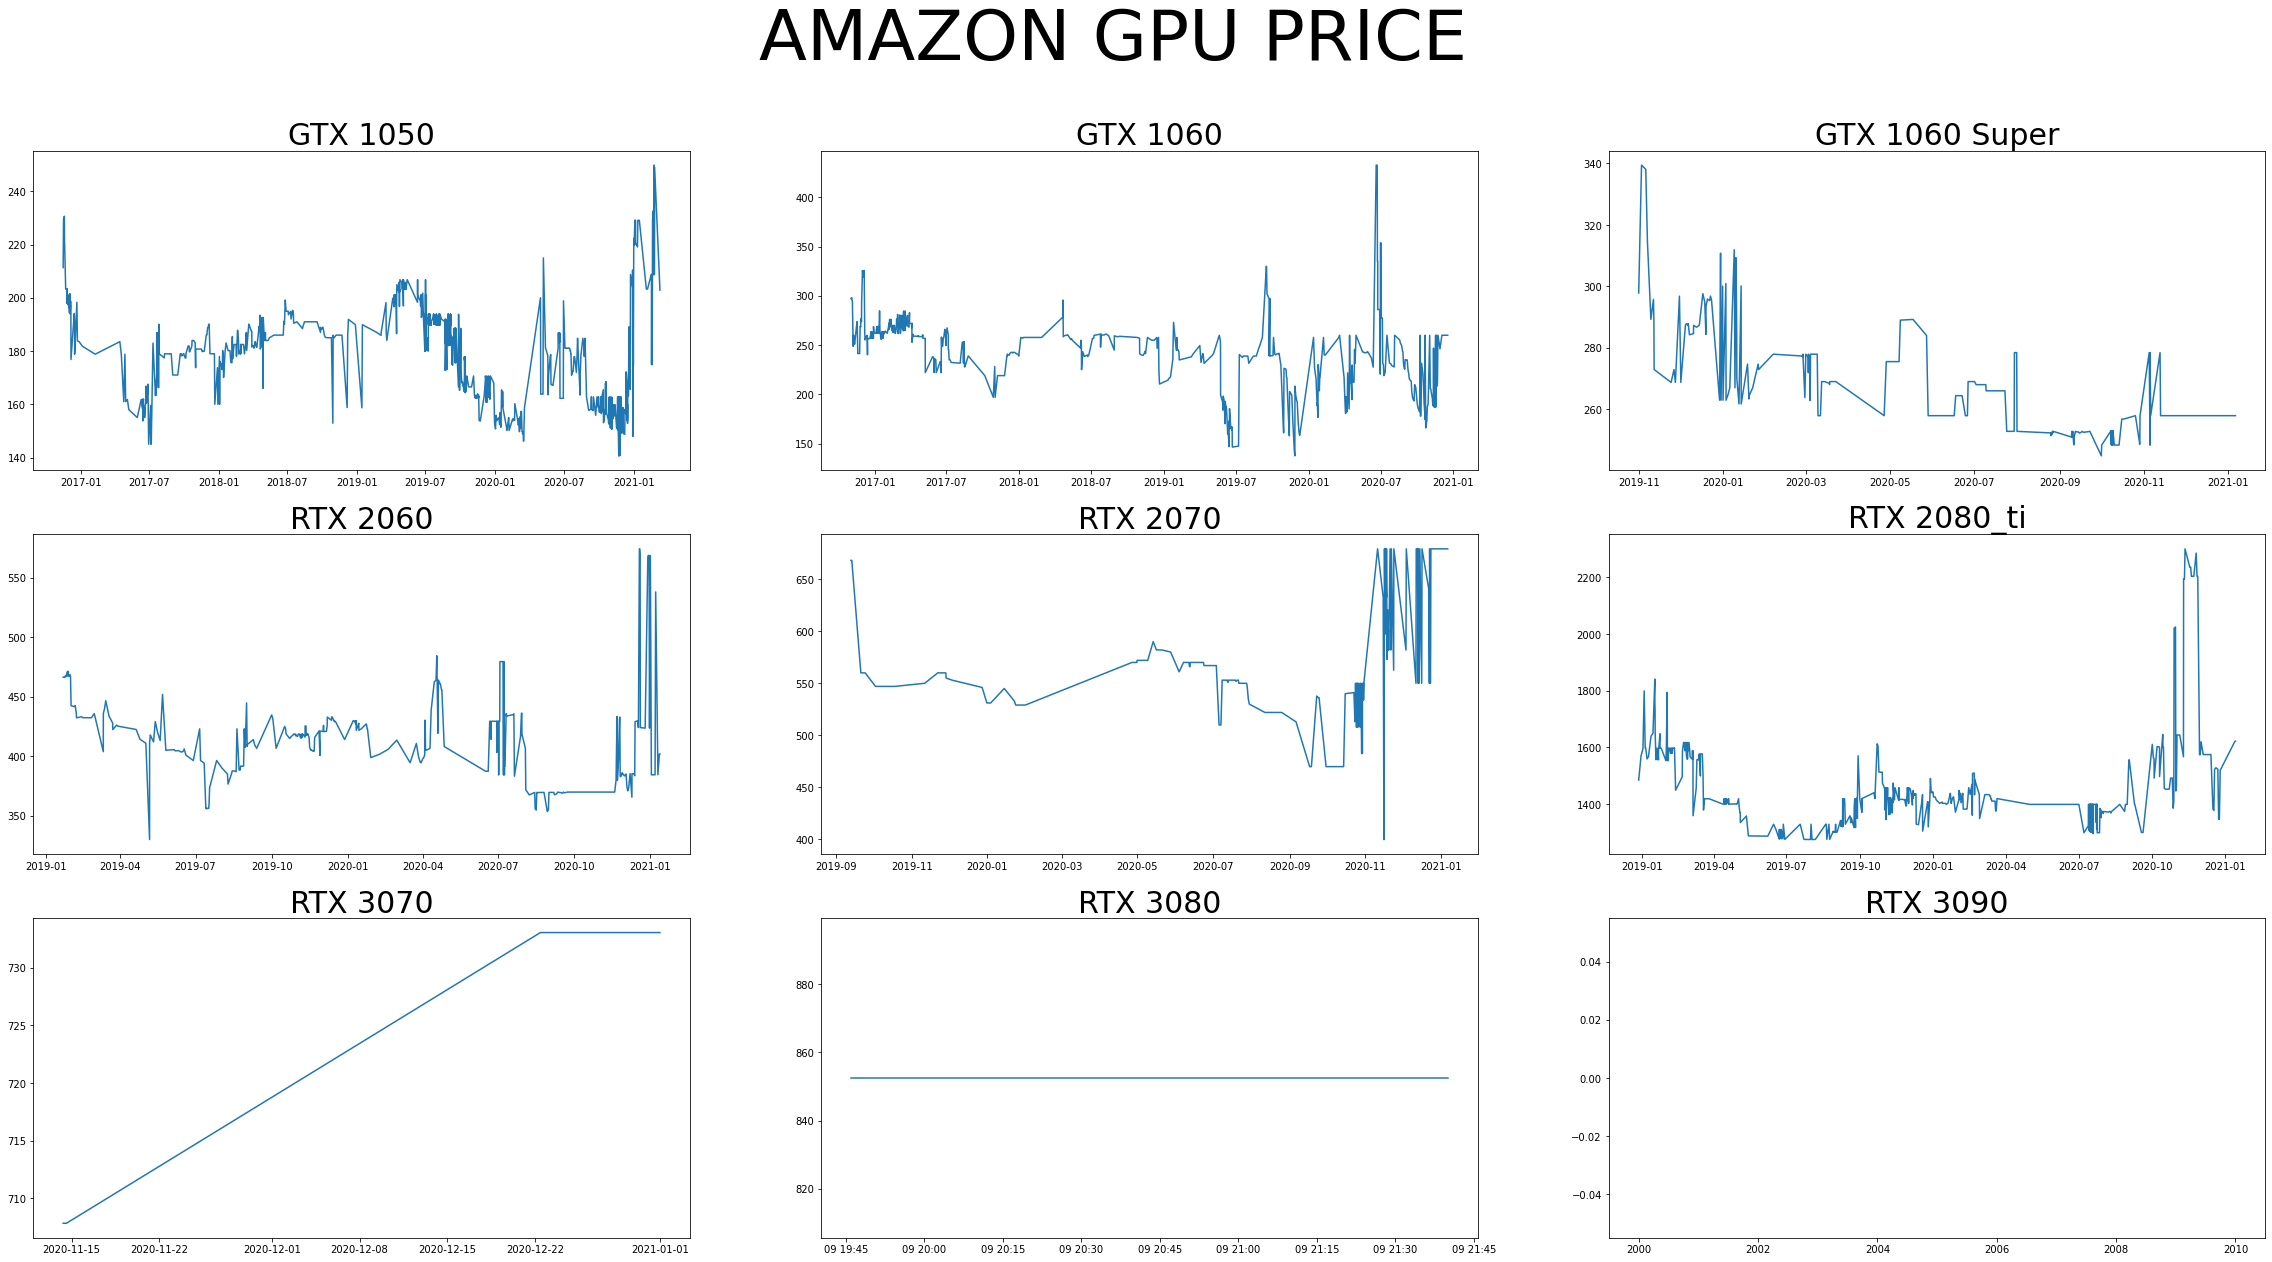

In [ ]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(40,20)
fig.suptitle('AMAZON GPU PRICE',size=70)
axs[0,0].plot(Amazon_1050.TIMESTAMP, Amazon_1050.PRICE)
axs[0, 0].set_title('GTX 1050',size=30)
axs[0,1].plot(Amazon_1060.TIMESTAMP, Amazon_1060.PRICE)
axs[0, 1].set_title('GTX 1060',size=30)
axs[0,2].plot(Amazon_1060_Super.TIMESTAMP, Amazon_1060_Super.PRICE)
axs[0, 2].set_title('GTX 1060 Super',size=30)
axs[1,0].plot(Amazon_2060.TIMESTAMP, Amazon_2060.PRICE)
axs[1, 0].set_title('RTX 2060',size=30)
axs[1,1].plot(Amazon_2070.TIMESTAMP, Amazon_2070.PRICE)
axs[1, 1].set_title('RTX 2070',size=30)
axs[1,2].plot(Amazon_2080_ti.TIMESTAMP,Amazon_2080_ti.PRICE)
axs[1, 2].set_title('RTX 2080_ti',size=30)
axs[2,0].plot(Amazon_3070.TIMESTAMP,Amazon_3070.PRICE)
axs[2, 0].set_title('RTX 3070',size=30)
axs[2,1].plot(Amazon_3080.TIMESTAMP,Amazon_3080.PRICE)
axs[2, 1].set_title('RTX 3080',size=30)
axs[2,2].plot(Amazon_3090.TIMESTAMP,Amazon_3090.PRICE)
axs[2, 2].set_title('RTX 3090',size=30)

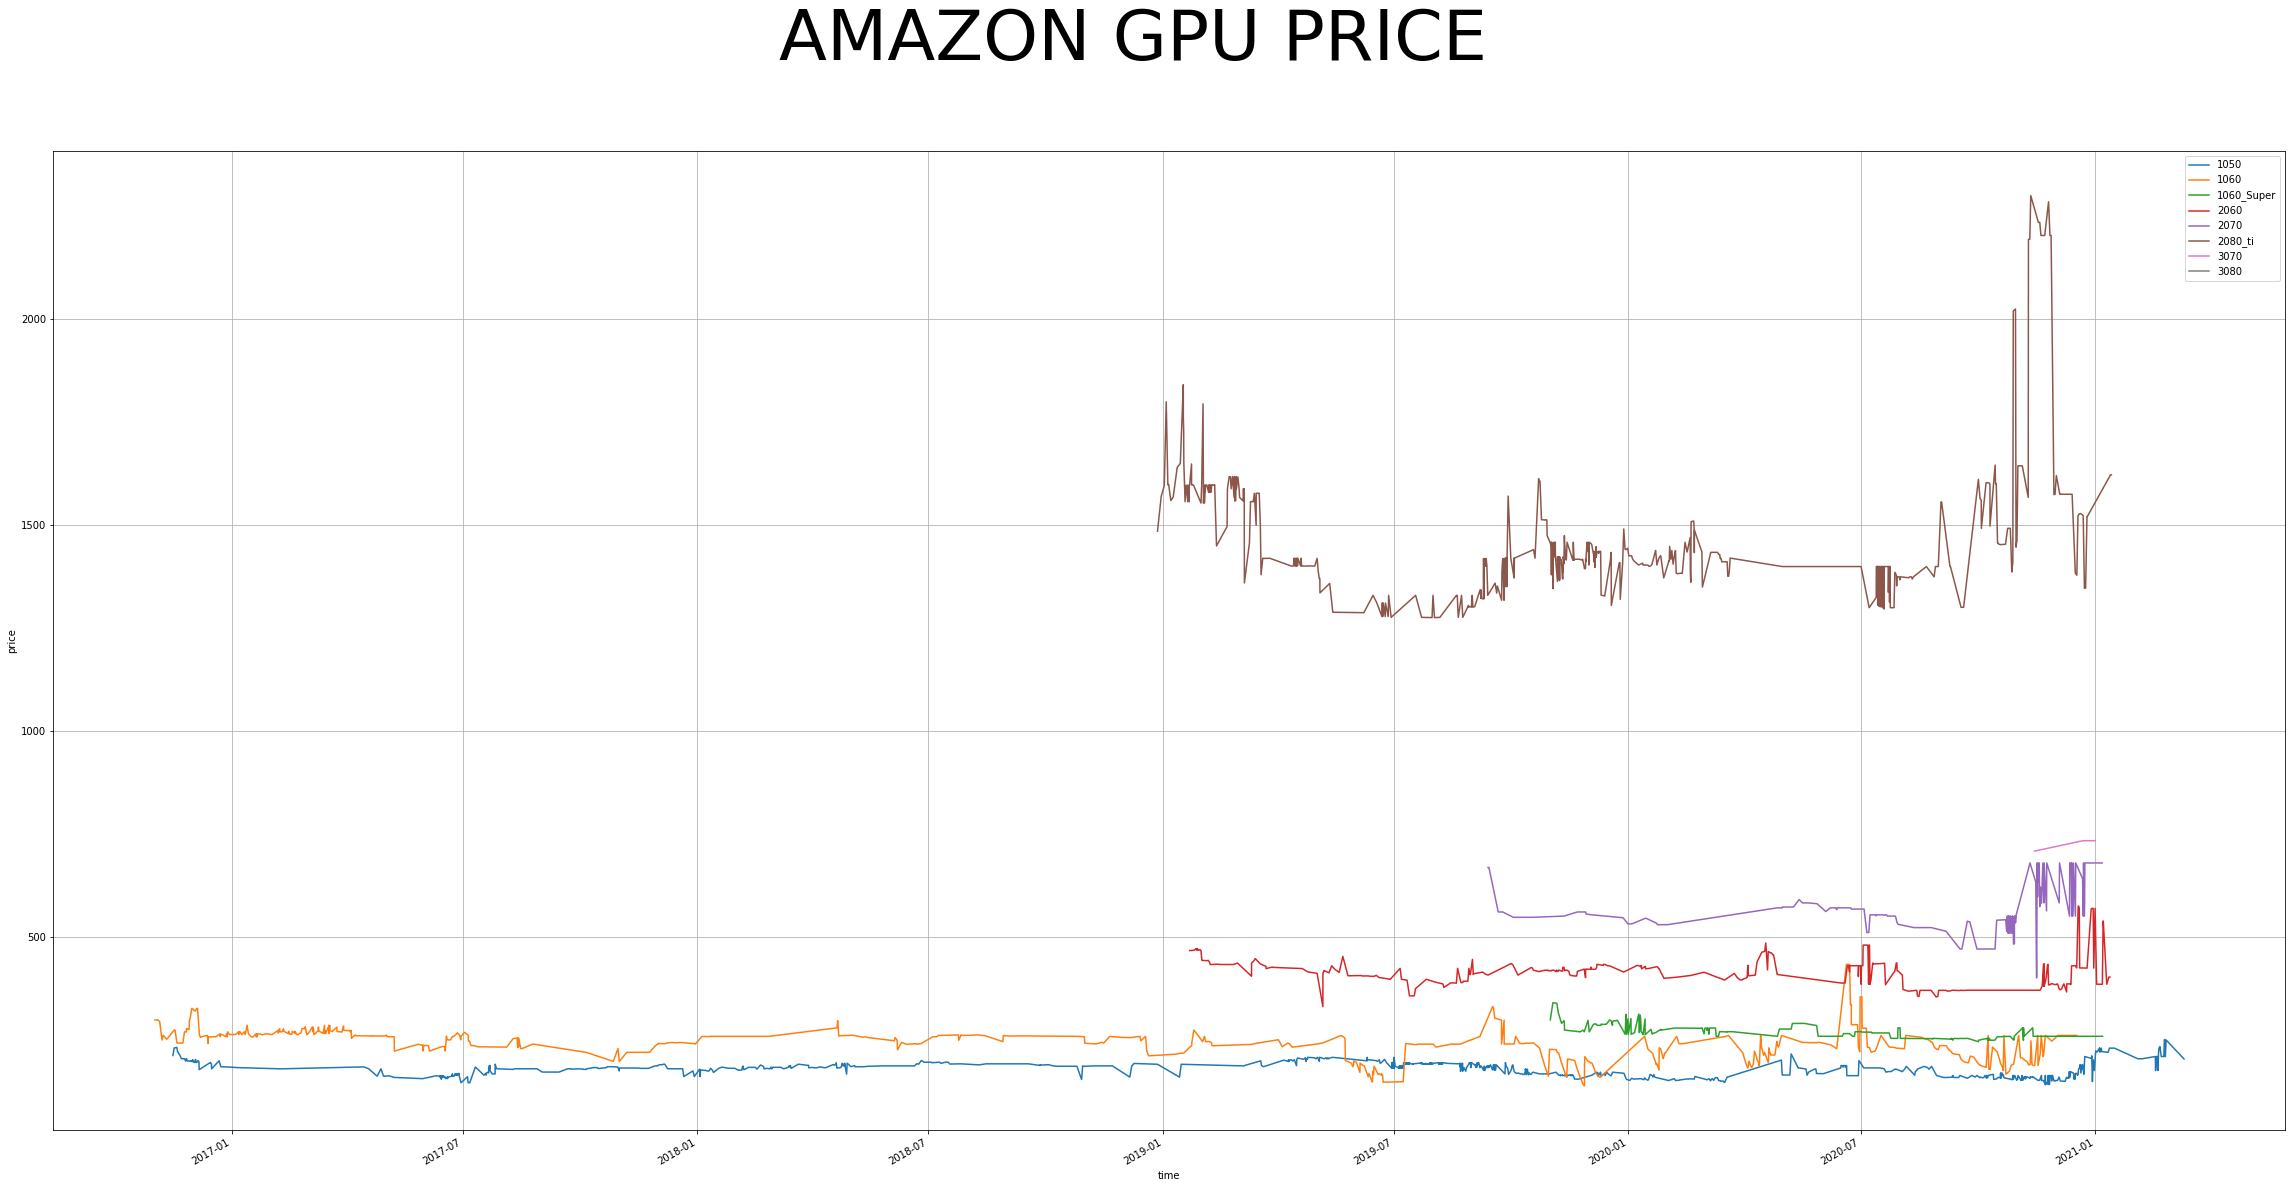

In [ ]:
#plot de histograma
fig = plt.figure(figsize=(40,20))
fig.suptitle('AMAZON GPU PRICE',size=70)
plt.plot(Amazon_1050.TIMESTAMP, Amazon_1050.PRICE, label='1050' )
plt.plot(Amazon_1060.TIMESTAMP, Amazon_1060.PRICE, label='1060')
plt.plot(Amazon_1060_Super.TIMESTAMP, Amazon_1060_Super.PRICE, label='1060_Super')
plt.plot(Amazon_2060.TIMESTAMP, Amazon_2060.PRICE, label='2060')
plt.plot(Amazon_2070.TIMESTAMP, Amazon_2070.PRICE, label='2070')
plt.plot(Amazon_2080_ti.TIMESTAMP, Amazon_2080_ti.PRICE, label='2080_ti')
plt.plot(Amazon_3070.TIMESTAMP, Amazon_3070.PRICE, label='3070')
plt.plot(Amazon_3080.TIMESTAMP, Amazon_3080.PRICE, label='3080')
plt.xlabel('time')
plt.ylabel('price')
plt.grid()
plt.legend(loc='upper right')
plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
#Aunque Amazon mantiene los precios originales y no se ve tan afectado por la demanda/oferta podemos ver que en mes de diciembre de 2021 hay una subida generalizada de todas las gráficas.

Text(0.5, 1.0, 'RTX 3090')

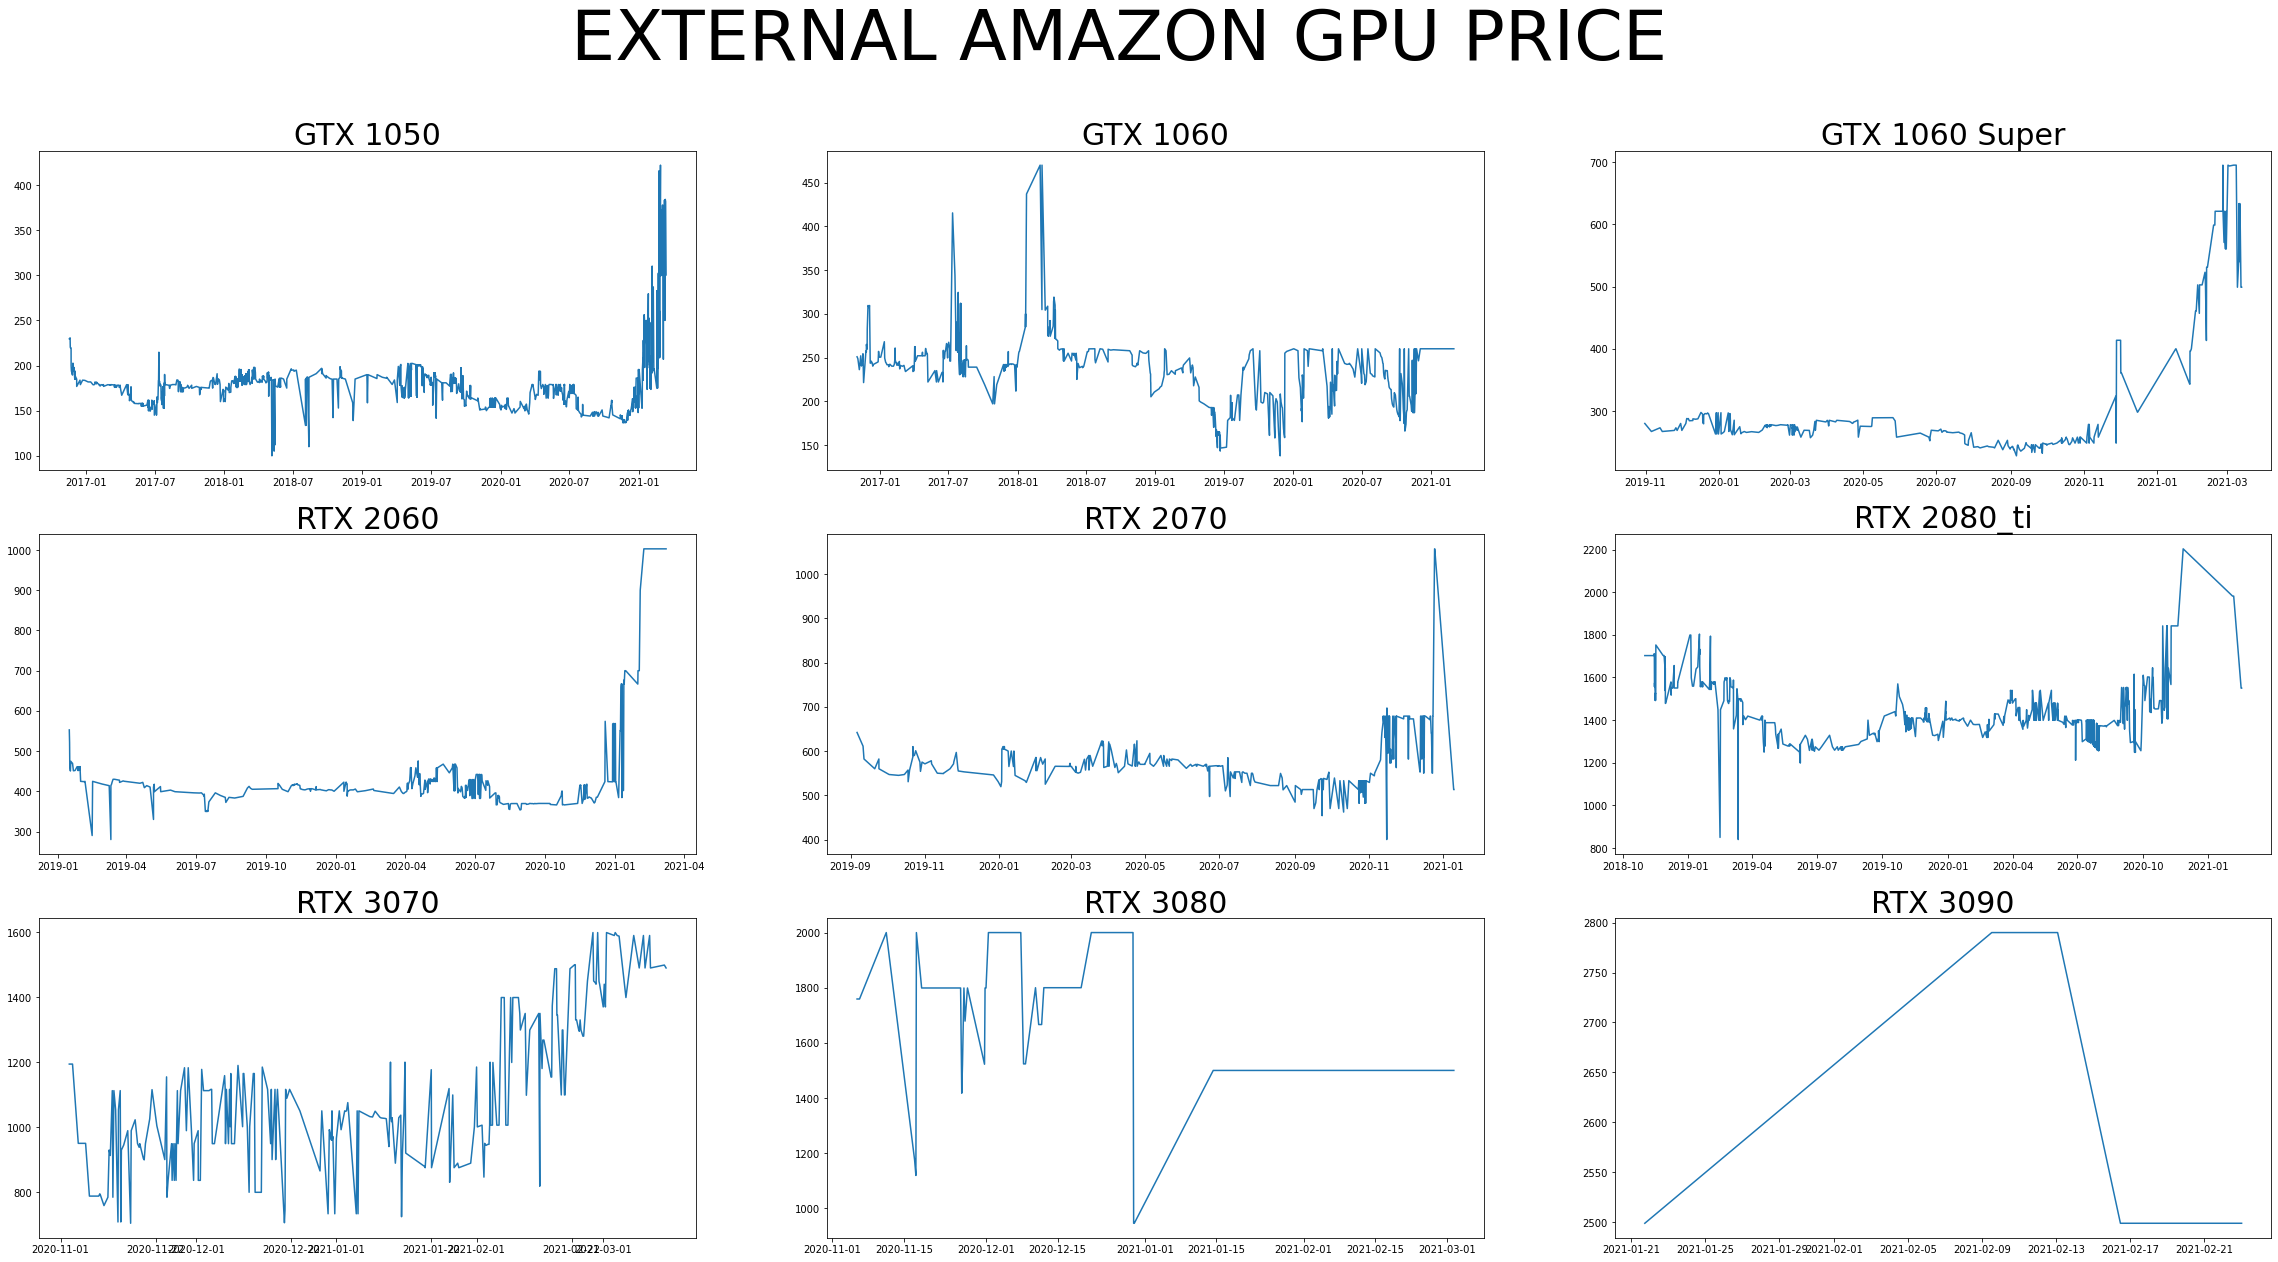

In [ ]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(40,20)
fig.suptitle('EXTERNAL AMAZON GPU PRICE',size=70)
axs[0,0].plot(Ext_1050.TIMESTAMP, Ext_1050.PRICE)
axs[0, 0].set_title('GTX 1050',size=30)
axs[0,1].plot(Ext_1060.TIMESTAMP, Ext_1060.PRICE)
axs[0, 1].set_title('GTX 1060',size=30)
axs[0,2].plot(Ext_1060_Super.TIMESTAMP, Ext_1060_Super.PRICE)
axs[0, 2].set_title('GTX 1060 Super',size=30)
axs[1,0].plot(Ext_2060.TIMESTAMP, Ext_2060.PRICE)
axs[1, 0].set_title('RTX 2060',size=30)
axs[1,1].plot(Ext_2070.TIMESTAMP, Ext_2070.PRICE)
axs[1, 1].set_title('RTX 2070',size=30)
axs[1,2].plot(Ext_2080_ti.TIMESTAMP,Ext_2080_ti.PRICE)
axs[1, 2].set_title('RTX 2080_ti',size=30)
axs[2,0].plot(Ext_3070.TIMESTAMP,Ext_3070.PRICE)
axs[2, 0].set_title('RTX 3070',size=30)
axs[2,1].plot(Ext_3080.TIMESTAMP,Ext_3080.PRICE)
axs[2, 1].set_title('RTX 3080',size=30)
axs[2,2].plot(Ext_3090.TIMESTAMP,Ext_3090.PRICE)
axs[2, 2].set_title('RTX 3090',size=30)

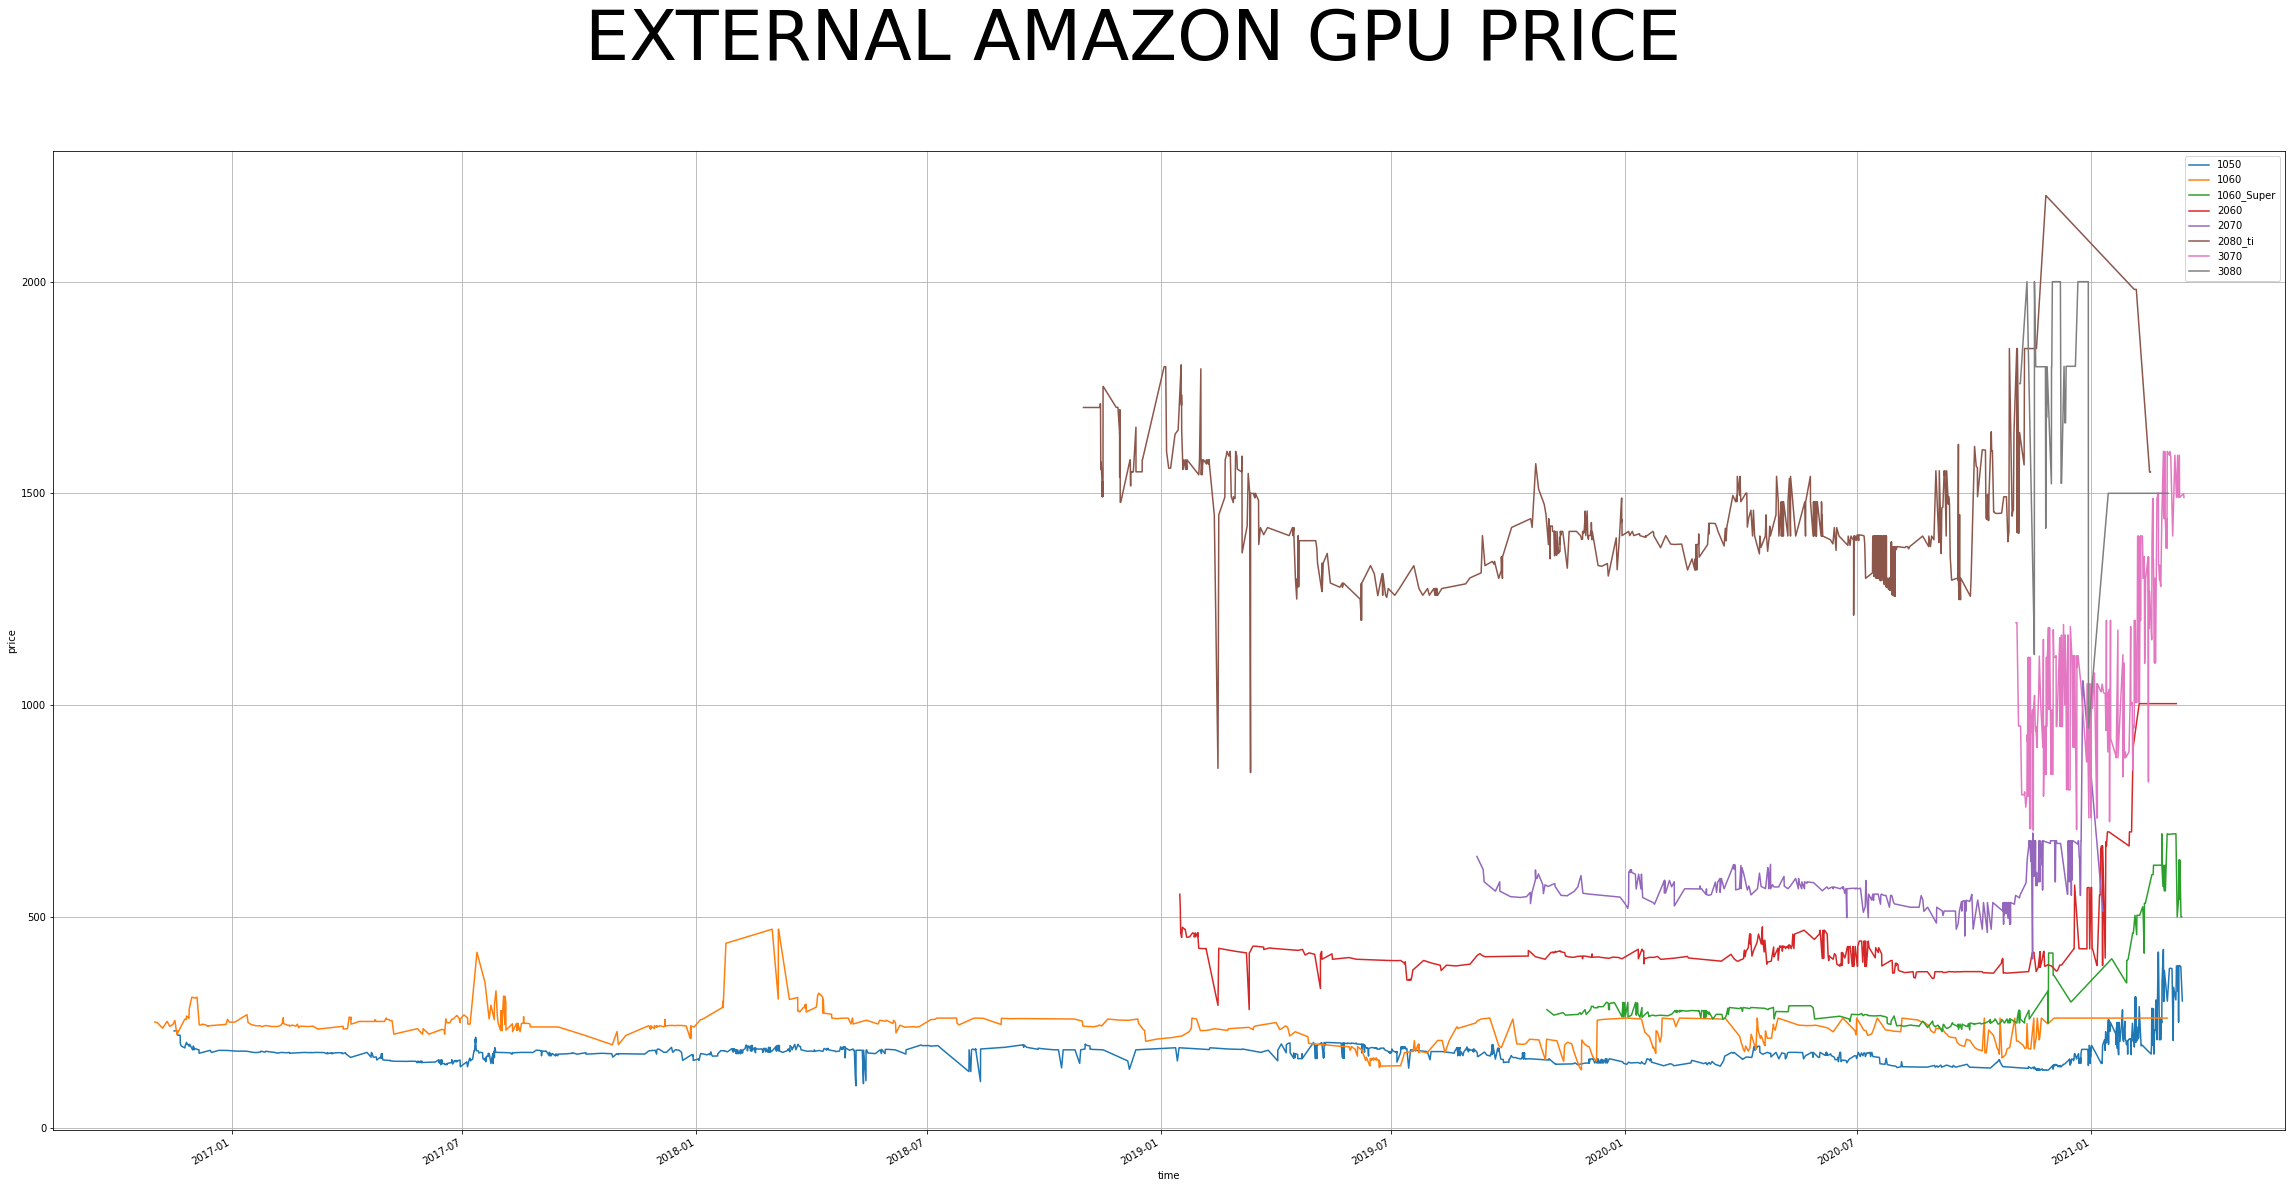

In [ ]:
#plot de histograma
fig = plt.figure(figsize=(40,20))
fig.suptitle('EXTERNAL AMAZON GPU PRICE',size=70)
plt.plot(Ext_1050.TIMESTAMP, Ext_1050.PRICE, label='1050' )
plt.plot(Ext_1060.TIMESTAMP, Ext_1060.PRICE, label='1060')
plt.plot(Ext_1060_Super.TIMESTAMP, Ext_1060_Super.PRICE, label='1060_Super')
plt.plot(Ext_2060.TIMESTAMP, Ext_2060.PRICE, label='2060')
plt.plot(Ext_2070.TIMESTAMP, Ext_2070.PRICE, label='2070')
plt.plot(Ext_2080_ti.TIMESTAMP, Ext_2080_ti.PRICE, label='2080_ti')
plt.plot(Ext_3070.TIMESTAMP, Ext_3070.PRICE, label='3070')
plt.plot(Ext_3080.TIMESTAMP, Ext_3080.PRICE, label='3080')
plt.xlabel('time')
plt.ylabel('price')
plt.grid()
plt.legend(loc='upper right')
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:

!pip install cryptocmd

     |████████████████████████████████| 51kB 3.7MB/s 


In [ ]:
from cryptocmd import CmcScraper
# initialise scraper without time interval
scraper = CmcScraper("ETH")

# get raw data as list of list
headers, data = scraper.get_data()

# get data in a json format
xrp_json_data = scraper.get_data("json")

# export the data as csv file, you can also pass optional `name` parameter
scraper.export("csv", name="eth_all_time")

# Pandas dataFrame for the same data
eth = scraper.get_dataframe()
eth_Market=eth[["Date","Market Cap"]]
eth_High=eth[["Date", "High"]]


def NormalizeData(data):
    return (data - numpy.min(data)) / (numpy.max(data) - numpy.min(data))

eth_Market_N=NormalizeData(eth_Market["Market Cap"])
eth_High_N=NormalizeData(eth_High["High"])
Ext_1050_N=NormalizeData(Ext_1050["PRICE"])
Ext_1060_N=NormalizeData(Ext_1060["PRICE"])
Ext_1060_super_N=NormalizeData(Ext_1060_Super["PRICE"])
Ext_2060_N=NormalizeData(Ext_2060["PRICE"])
Ext_2070_N=NormalizeData(Ext_2070["PRICE"])
Ext_3070_N=NormalizeData(Ext_3070["PRICE"])
eth_Market_N=pd.concat([eth_Market["Date"],eth_Market_N],axis=1)
eth_High_N=pd.concat([eth_High["Date"], eth_High_N],axis=1)
Ext_1050_N=pd.concat([Ext_1050["TIMESTAMP"],Ext_1050_N],axis=1)
Ext_1050_N_NT=Ext_1050_N
Ext_1060_N=pd.concat([Ext_1060["TIMESTAMP"],Ext_1060_N],axis=1)
Ext_1060_super_N=pd.concat([Ext_1060_Super["TIMESTAMP"],Ext_1060_super_N],axis=1)
Ext_2060_N=pd.concat([Ext_2060["TIMESTAMP"],Ext_2060_N],axis=1)
Ext_2070_N=pd.concat([Ext_2070["TIMESTAMP"],Ext_2070_N],axis=1)
Ext_3070_N=pd.concat([Ext_3070["TIMESTAMP"],Ext_3070_N],axis=1)

eth_Market_N.set_index('Date', inplace=True, drop=True)
eth_High_N.set_index('Date', inplace=True, drop=True)
Ext_1050_N.set_index('TIMESTAMP', inplace=True, drop=True)
Ext_1060_N.set_index('TIMESTAMP', inplace=True, drop=True)
Ext_1060_super_N.set_index('TIMESTAMP', inplace=True, drop=True)
Ext_2060_N.set_index('TIMESTAMP', inplace=True, drop=True)
Ext_2070_N.set_index('TIMESTAMP', inplace=True, drop=True)
Ext_3070_N.set_index('TIMESTAMP', inplace=True, drop=True)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


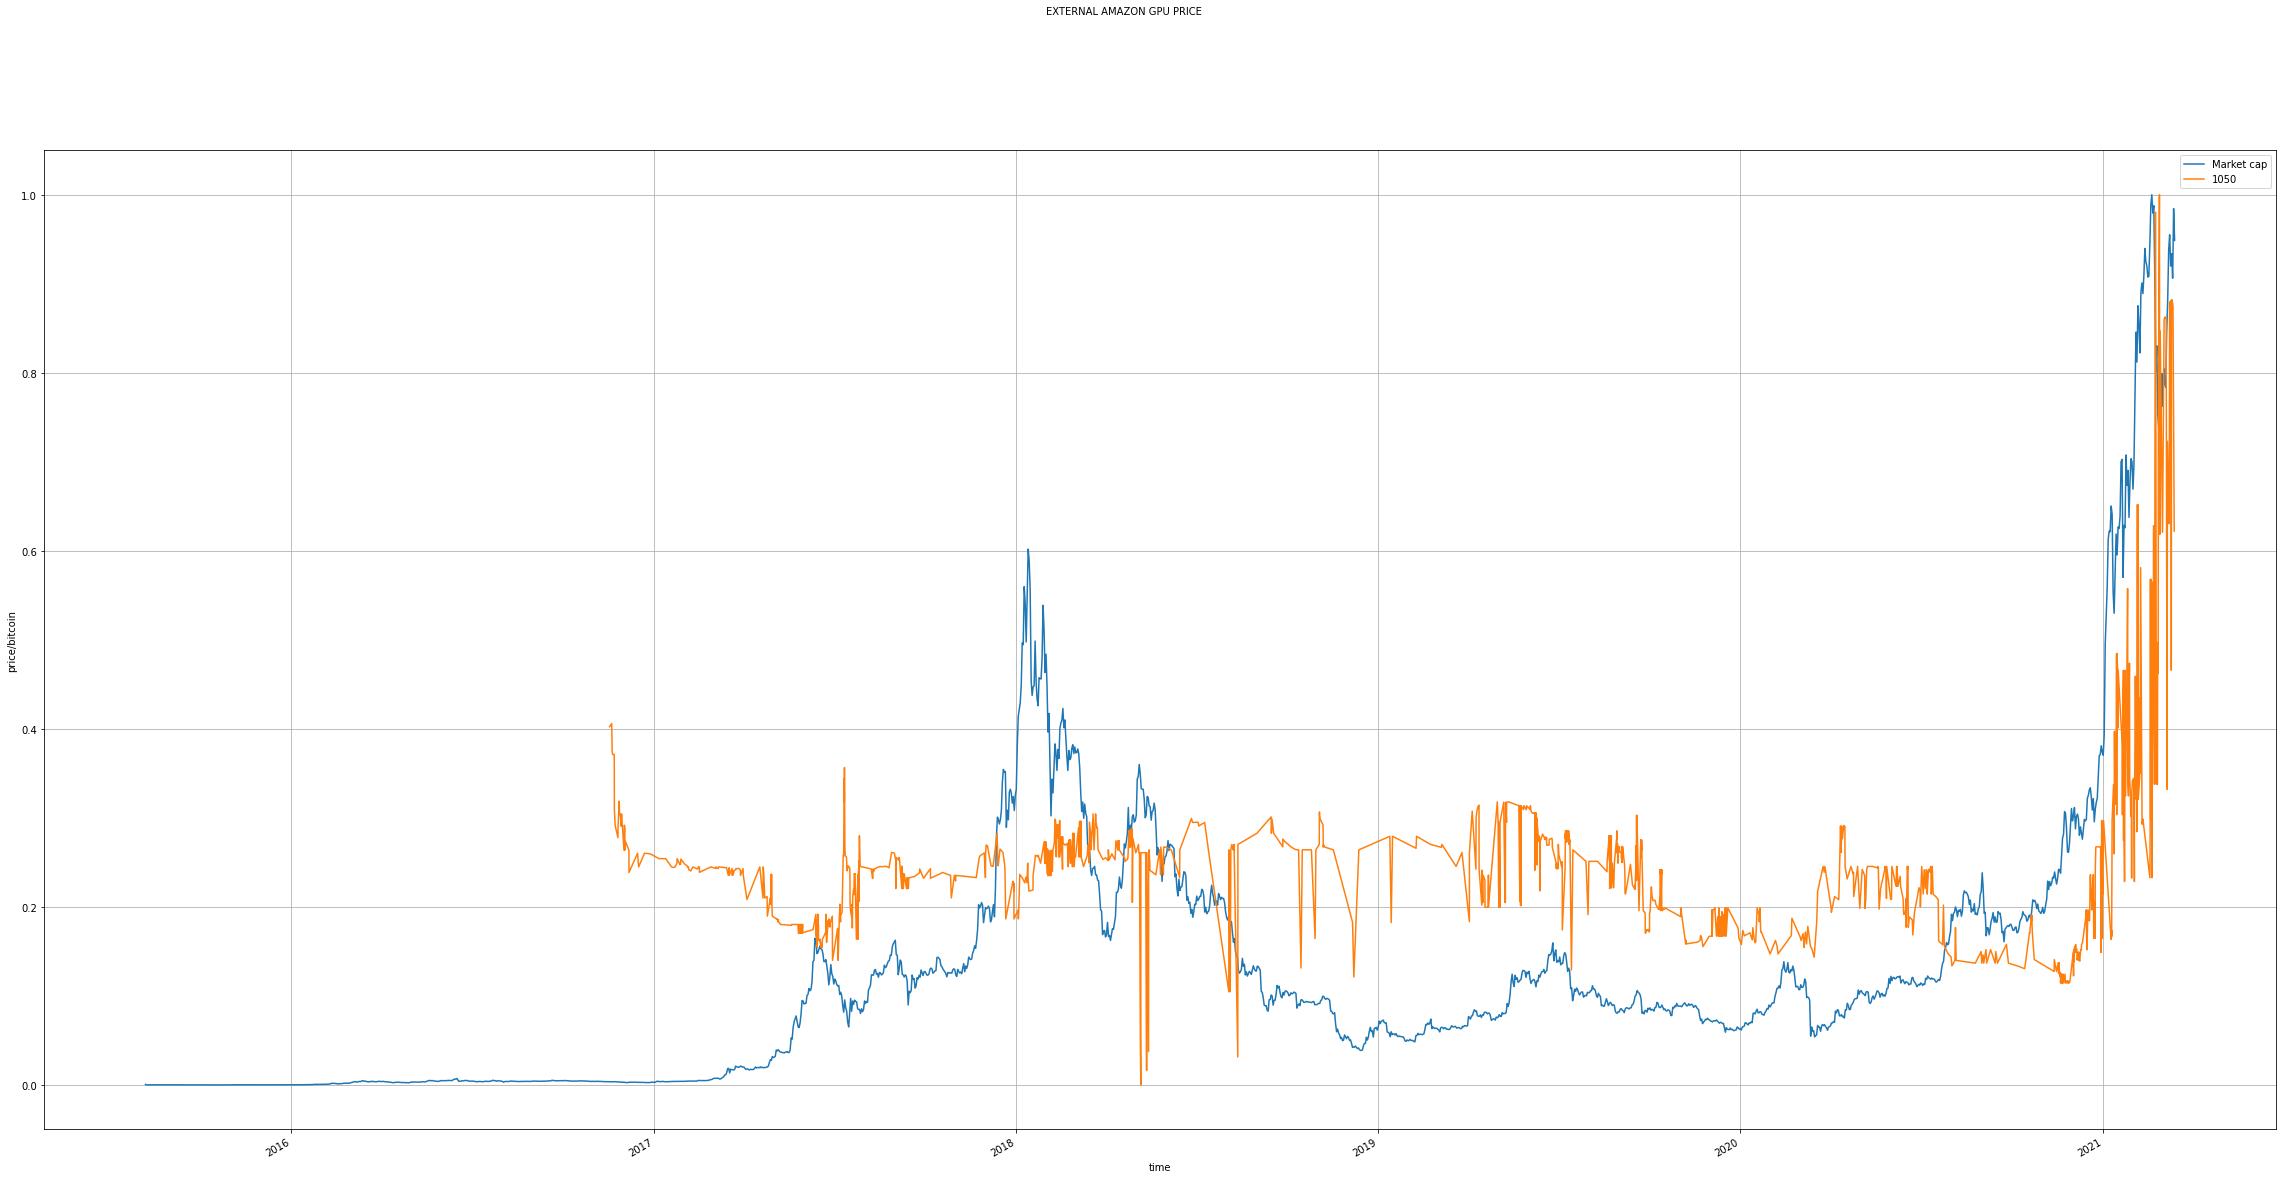

In [ ]:
#Minimo 4Gb de Ram
plt.close()
fig = plt.figure(figsize=(40,20))
#fig.set_size_inches(40,20)
fig.suptitle('EXTERNAL AMAZON GPU PRICE',size=10)
plt.plot(eth_Market_N["Market Cap"], label='Market cap')
#plt.plot(bitcoin_High_N["High"], label='Bitcoin High')
plt.plot(Ext_1050_N.PRICE, label='1050' )
#plt.plot(Ext_1060_N.PRICE, label='1060' )
#plt.plot(Ext_2060_N.PRICE, label='2060' )
plt.xlabel('time')
plt.ylabel('price/bitcoin')
plt.grid()
plt.legend(loc='upper')
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
import calendar
import numpy as np
import scipy.stats as stats

#Ext_1050_m
Ext_1050_m=Ext_1050_N.copy()
Ext_1050_m['TIMESTAMP'] = Ext_1050_m.index
Ext_1050_m = Ext_1050_m.set_index('TIMESTAMP').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')

lenth=(len(eth_High_N)-len(Ext_1050_m))
lenth2=len(Ext_1050_m)-1

Ext_1050_m1=(Ext_1050_m[:lenth2])
eth_High_N=eth_High_N.iloc[::-1]

Final=pd.concat([Ext_1050_m1,eth_High_N],axis=1)
Final=Final.dropna()

overall_pearson_r = Final.corr().iloc[0,1]
r, p = stats.pearsonr(Final['PRICE'], Final['High'])


#1060
Ext_1060_m=Ext_1060_N.copy()
Ext_1060_m['TIMESTAMP'] = Ext_1060_m.index
Ext_1060_m = Ext_1060_m.set_index('TIMESTAMP').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
lenth1=(len(eth_High_N)-len(Ext_1060_m))
lenth3=len(Ext_1060_m)-1

Ext_1060_m1=(Ext_1060_m[:lenth3])
#eth_High_N=eth_High_N.iloc[::-1]

Final1=pd.concat([Ext_1060_m1,eth_High_N],axis=1)
Final1=Final1.dropna()

overall_pearson_r1 = Final1.corr().iloc[0,1]
r1, p1 = stats.pearsonr(Final1['PRICE'], Final1['High'])

#1060_super
Ext_1060_super_m=Ext_1060_super_N.copy()
Ext_1060_super_m['TIMESTAMP'] = Ext_1060_super_m.index
Ext_1060_super_m = Ext_1060_super_m.set_index('TIMESTAMP').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
lenth1=(len(eth_High_N)-len(Ext_1060_super_m))
lenth3=len(Ext_1060_super_m)-1

Ext_1060_super_m1=(Ext_1060_super_m[:lenth3])
#eth_High_N=eth_High_N.iloc[::-1]

Final2=pd.concat([Ext_1060_super_m1,eth_High_N],axis=1)
Final2=Final2.dropna()

overall_pearson_r2 = Final2.corr().iloc[0,1]
r2, p2 = stats.pearsonr(Final2['PRICE'], Final2['High'])

#2060_super
Ext_2060_m=Ext_2060_N.copy()
Ext_2060_m['TIMESTAMP'] = Ext_2060_m.index
Ext_2060_m = Ext_2060_m.set_index('TIMESTAMP').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
lenth1=(len(eth_High_N)-len(Ext_2060_m))
lenth3=len(Ext_2060_m)-1

Ext_2060_m1=(Ext_2060_m[:lenth3])
#eth_High_N=eth_High_N.iloc[::-1]

Final3=pd.concat([Ext_2060_m1,eth_High_N],axis=1)
Final3=Final3.dropna()

overall_pearson_r3 = Final3.corr().iloc[0,1]
r2, p2 = stats.pearsonr(Final3['PRICE'], Final3['High'])

#2060
Ext_2070_m=Ext_2070_N.copy()
Ext_2070_m['TIMESTAMP'] = Ext_2070_m.index
Ext_2070_m = Ext_2070_m.set_index('TIMESTAMP').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
lenth1=(len(eth_High_N)-len(Ext_2070_m))
lenth3=len(Ext_2070_m)-1

Ext_2070_m1=(Ext_2070_m[:lenth3])
#eth_High_N=eth_High_N.iloc[::-1]

Final4=pd.concat([Ext_2070_m1,eth_High_N],axis=1)
Final4=Final4.dropna()

overall_pearson_r4 = Final4.corr().iloc[0,1]
r3, p3 = stats.pearsonr(Final4['PRICE'], Final4['High'])

#3070
Ext_3070_m=Ext_3070_N.copy()
Ext_3070_m['TIMESTAMP'] = Ext_3070_m.index
Ext_3070_m = Ext_3070_m.set_index('TIMESTAMP').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
lenth1=(len(eth_High_N)-len(Ext_3070_m))
lenth3=len(Ext_3070_m)-1

Ext_3070_m1=(Ext_3070_m[:lenth3])
#eth_High_N=eth_High_N.iloc[::-1]

Final5=pd.concat([Ext_3070_m1,eth_High_N],axis=1)
Final5=Final5.dropna()

overall_pearson_r5 = Final5.corr().iloc[0,1]
r4, p4 = stats.pearsonr(Final5['PRICE'], Final5['High'])






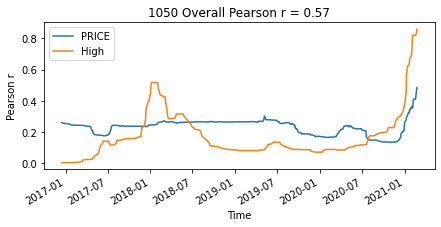

In [ ]:
#1050
f,ax=plt.subplots(figsize=(7,3))
Final.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"1050 Overall Pearson r = {np.round(overall_pearson_r,2)}");



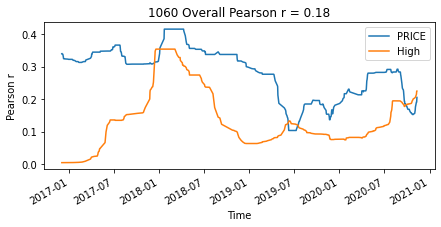

In [ ]:
#Faltan datos actuales
#1060
f1,ax1=plt.subplots(figsize=(7,3))
Final1.rolling(window=30,center=True).median().plot(ax=ax1)
ax1.set(xlabel='Time',ylabel='Pearson r')
ax1.set(title=f"1060 Overall Pearson r = {np.round(overall_pearson_r1,2)}");

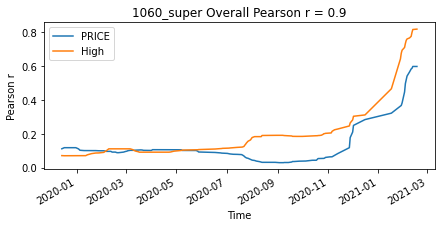

In [ ]:
#1060_super
f2,ax2=plt.subplots(figsize=(7,3))
Final2.rolling(window=30,center=True).median().plot(ax=ax2)
ax2.set(xlabel='Time',ylabel='Pearson r')
ax2.set(title=f"1060_super Overall Pearson r = {np.round(overall_pearson_r2,2)}");

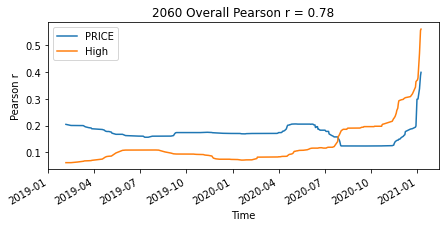

In [ ]:
#Faltam datos actuales
#2060
f3,ax3=plt.subplots(figsize=(7,3))
Final3.rolling(window=30,center=True).median().plot(ax=ax3)
ax3.set(xlabel='Time',ylabel='Pearson r')
ax3.set(title=f"2060 Overall Pearson r = {np.round(overall_pearson_r3,2)}");

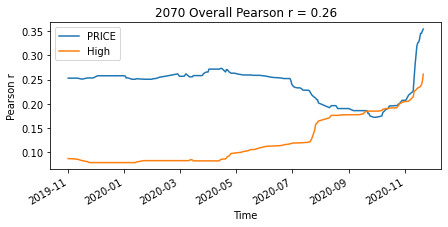

In [ ]:
#Faltan datos actuales
#2070
f4,ax4=plt.subplots(figsize=(7,3))
Final4.rolling(window=30,center=True).median().plot(ax=ax4)
ax4.set(xlabel='Time',ylabel='Pearson r')
ax4.set(title=f"2070 Overall Pearson r = {np.round(overall_pearson_r4,2)}");

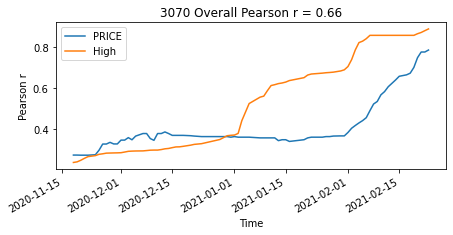

In [ ]:
#3070
f5,ax5=plt.subplots(figsize=(7,3))
Final5.rolling(window=30,center=True).median().plot(ax=ax5)
ax5.set(xlabel='Time',ylabel='Pearson r')
ax5.set(title=f"3070 Overall Pearson r = {np.round(overall_pearson_r5,2)}");

Text(0.5, 0.98, '1050 data and rolling window correlation')

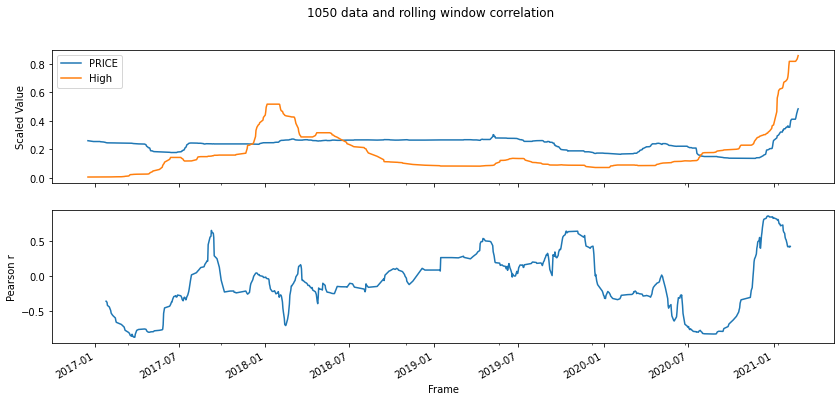

In [ ]:

# Set window size to compute moving window synchrony.
r_window_size = 50
# Interpolate missing data.
df_interpolated = Final.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['PRICE'].rolling(window=r_window_size, center=True).corr(df_interpolated['High'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
Final.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Scaled Value')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("1050 data and rolling window correlation")

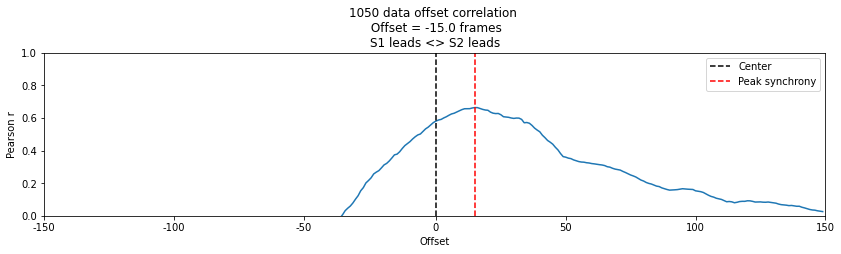

In [ ]:
#shiftear grafica para ver si hay una distancia tiempo
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = Final['PRICE']
d2 = Final['High']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'1050 data offset correlation \n Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[0,1],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()


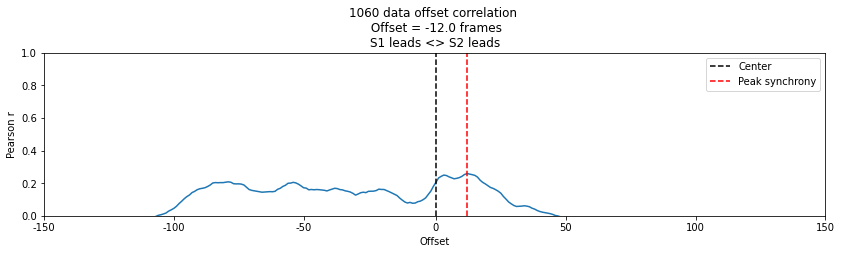

In [ ]:
d1 = Final1['PRICE']
d2 = Final1['High']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'1060 data offset correlation \n Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[0,1],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

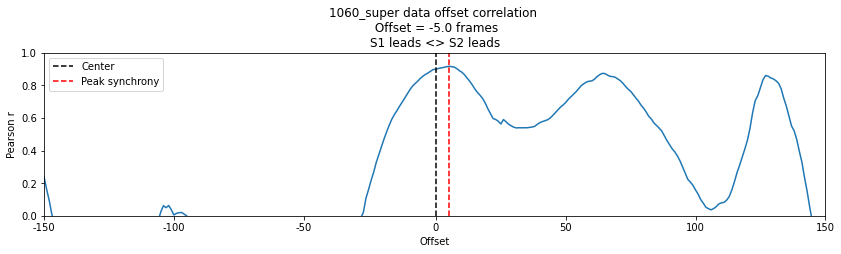

In [ ]:
d1 = Final2['PRICE']
d2 = Final2['High']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'1060_super data offset correlation \n Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[0,1],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

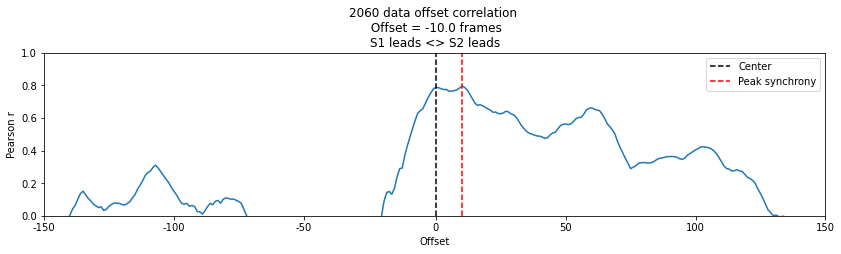

In [ ]:
d1 = Final3['PRICE']
d2 = Final3['High']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'2060 data offset correlation \n Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[0,1],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


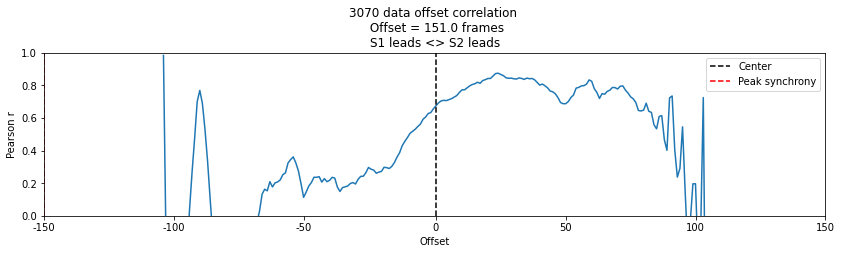

In [ ]:
d1 = Final5['PRICE']
d2 = Final5['High']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'3070 data offset correlation \n Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[0,1],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [ ]:
#aumenta la correlación con el precio del etherum a los 10 dias.

In [ ]:
Final=Final.reset_index()
print(Final)

         index     PRICE      High
0   2016-11-16  0.402428  0.004835
1   2016-11-18  0.405719  0.004678
2   2016-11-19  0.384119  0.004550
3   2016-11-20  0.371037  0.004533
4   2016-11-21  0.340501  0.004497
..         ...       ...       ...
628 2021-03-08  0.733867  0.901221
629 2021-03-09  0.880057  0.917361
630 2021-03-10  0.700079  0.920187
631 2021-03-11  0.882106  0.905459
632 2021-03-12  0.874717  0.903336

[633 rows x 3 columns]


In [ ]:
#Window y lag WTLCC; windowed time lagged cross correlations
# Windowed time lagged cross correlation


In [ ]:
#############################

In [ ]:
###Predecir precio futuro tarjetas gráficas
import numpy as np
df1=Final.reset_index()["PRICE"]


In [ ]:
#Normalizamos
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(411, 222)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(380, 30)
(380,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 30, 50)            10400     
_________________________________________________________________
lstm_61 (LSTM)               (None, 30, 50)            20200     
_________________________________________________________________
lstm_62 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=20,verbose=1)

Epoch 1/30
19/19 [==============================] - 5s 97ms/step - loss: 0.0071 - val_loss: 0.0200
Epoch 2/30
19/19 [==============================] - 1s 34ms/step - loss: 0.0019 - val_loss: 0.0221
Epoch 3/30
19/19 [==============================] - 1s 34ms/step - loss: 0.0016 - val_loss: 0.0216
Epoch 4/30
19/19 [==============================] - 1s 35ms/step - loss: 0.0018 - val_loss: 0.0208
Epoch 5/30
19/19 [==============================] - 1s 35ms/step - loss: 0.0018 - val_loss: 0.0184
Epoch 6/30
19/19 [==============================] - 1s 35ms/step - loss: 0.0017 - val_loss: 0.0171
Epoch 7/30
19/19 [==============================] - 1s 37ms/step - loss: 0.0016 - val_loss: 0.0161
Epoch 8/30
19/19 [==============================] - 1s 37ms/step - loss: 0.0014 - val_loss: 0.0144
Epoch 9/30
19/19 [==============================] - 1s 37ms/step - loss: 0.0018 - val_loss: 0.0156
Epoch 10/30
19/19 [==============================] - 1s 36ms/step - loss: 0.0017 - val_loss: 0.0160
Epoch 11/

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.08702963870036998

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.12639596307412124

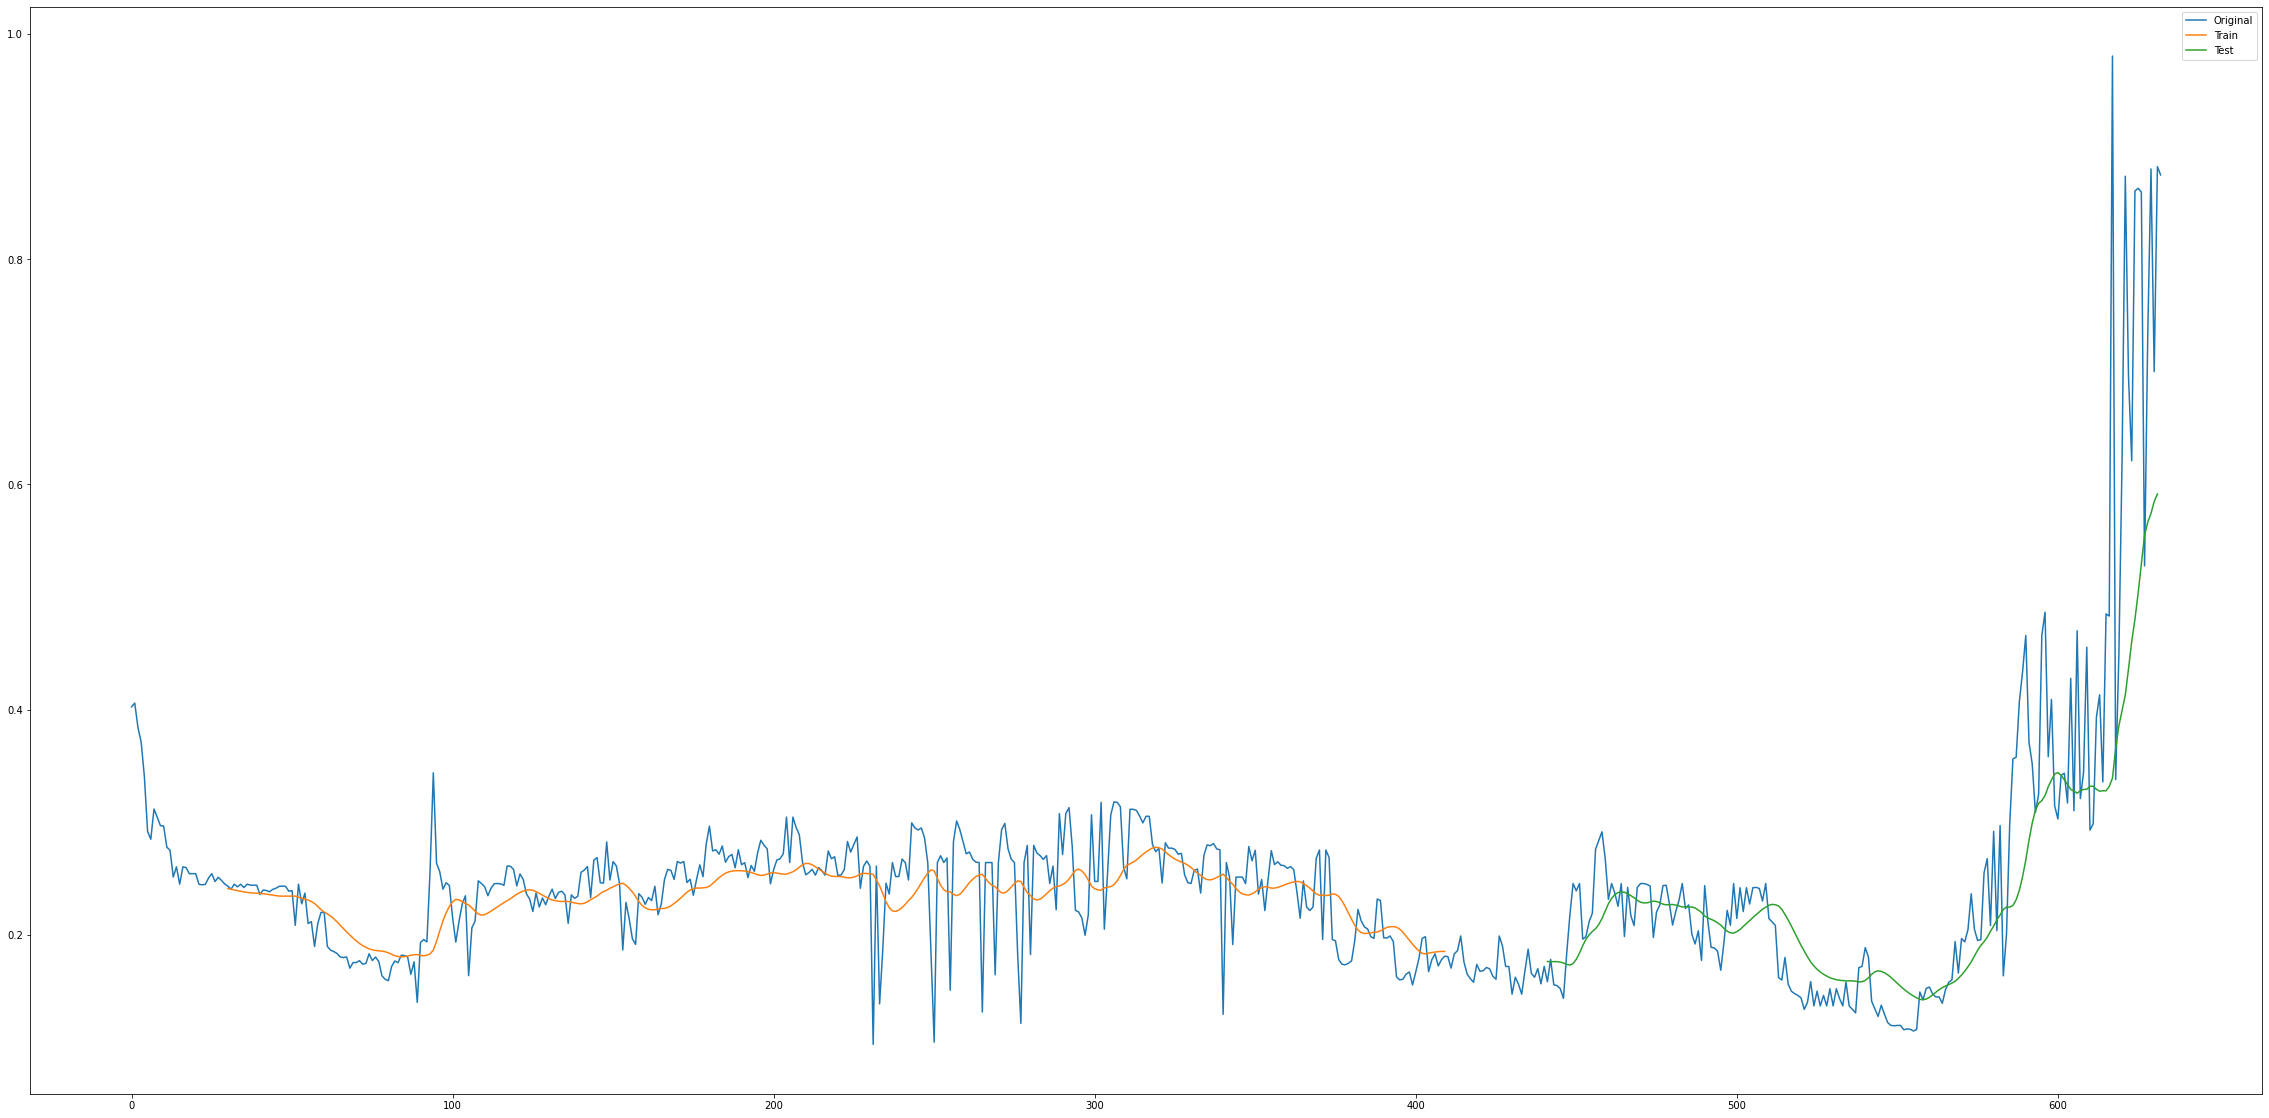

In [ ]:
# shift train predictions for plotting
plt.close()
fig = plt.figure(figsize=(40,20))
look_back=time_step
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label='Original')
plt.plot(trainPredictPlot,label='Train')
plt.plot(testPredictPlot,label='Test')
plt.legend(loc='best')
plt.show()

In [ ]:
len(test_data)

222

In [ ]:
x_input=test_data[100:].reshape(1,-1)
x_input.shape
x_input.shape[1]

122

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=118  ###input shape
i=0
while(i<30):
    
    if(len(temp_input)>90):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, x_input.shape[1], 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, x_input.shape[1],1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
print(len(lst_output))

0 day input [0.12029809 0.06758956 0.06511332 0.0879301  0.06086833 0.05379336
 0.05131712 0.04954838 0.04707214 0.03539844 0.04247341 0.06352145
 0.03893592 0.05379336 0.03893592 0.04954838 0.03893592 0.0562696
 0.03893592 0.0562696  0.04636464 0.03893592 0.06299083 0.03893592
 0.03539844 0.03186095 0.0776596  0.07887414 0.09787751 0.08831922
 0.04353466 0.03592906 0.02832347 0.03960805 0.03036342 0.0220179
 0.01917907 0.01880763 0.01917907 0.01917907 0.01475721 0.01567696
 0.01531436 0.01353678 0.01502252 0.05301512 0.04514775 0.05674716
 0.05793222 0.05093979 0.04799189 0.04799189 0.04162441 0.05533807
 0.06284933 0.06518407 0.10404335 0.07218829 0.10713865 0.10370728
 0.11618046 0.15231234 0.11658373 0.10507511 0.10595948 0.17351956
 0.18786407 0.12019197 0.21559795 0.11515695 0.22147018 0.0693583
 0.11160472 0.22297361 0.28890645 0.29048652 0.34681214 0.37687192
 0.41373252 0.30575962 0.28394217 0.23462963 0.25316605 0.41387402
 0.43726859 0.29104073 0.3490496  0.2414216  0.228076

In [ ]:
day_new=np.arange(1,115)
day_pred=np.arange(115,145)

In [ ]:
len(df1)

633

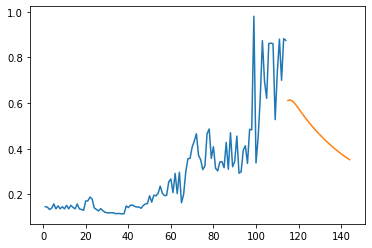

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df1[398+x_input.shape[1]:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

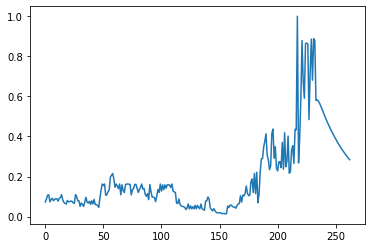

In [ ]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[400:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

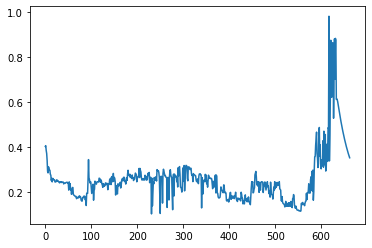

In [ ]:
plt.plot(df3)